# Tutorial 7 - TensorFlow

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2025-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Tutorials/Tutorial_7-TensorFlow/Tutorial_7-TensorFlow.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2025-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Tutorials/Tutorial_7-TensorFlow/Tutorial_7-TensorFlow.ipynb)

<a id='top'></a>

This tutorial is adapted from a blog post by Goku Mohandas posted on the website [Made With ML](https://madewithml.com/).

We will first import `TensorFlow` and `NumPy` and set the seed for their random number generators for reproducibility.

In [1]:
import numpy as np
import tensorflow as tf 

print(f'TF version: {tf.__version__ }')

TF version: 2.17.1


In [2]:
# Set seed for reproducability
np.random.seed(seed=1)
tf.random.set_seed(seed=1)

## TensorFlow Basics

First, we will cover some basics such as creating TensorFlow tensors and converting from common data structures to TensorFlow tensors.

In [3]:
x = tf.random.normal((2, 3))

print(f'Type: {x.dtype}')
print(f'shape: {x.shape}')
print(f'values:\n{x}')

Type: <dtype: 'float32'>
shape: (2, 3)
values:
[[-1.1012203   1.5457517   0.383644  ]
 [-0.87965786 -1.2246722  -0.9811211 ]]


In [4]:
# Zeros and ones tensors
x = tf.zeros((2, 3), dtype=tf.float64)
print(x)

x = tf.ones((2, 3))
print(x)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float64)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In TensorFlow, `tf.constant` creates an immutable tensor. 

To convert a Python list to a TensorFlow tensor, we can use the following code.

In [5]:
# List to Tensor
x = tf.constant([[1, 2, 3], [4, 5, 6]])

print(f'shape: {x.shape}')
print(f'values:\n{x}')

shape: (2, 3)
values:
[[1 2 3]
 [4 5 6]]


Also, we can use `tf.convert_to_tensor` as in the following cell.

In [6]:
# List to Tensor
x = tf.convert_to_tensor([[1, 2, 3], [4, 5, 6]])

print(f'shape: {x.shape}')
print(f'values:\n{x}')

shape: (2, 3)
values:
[[1 2 3]
 [4 5 6]]


In [7]:
# Numpy array to Tensor
x = tf.constant(np.random.rand(2, 3))

print(f'shape: {x.shape}')
print(f'values:\n{x}')

shape: (2, 3)
values:
[[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]]


We can also use `tf.Variable` to create a tensor that is trainable and mutable, i.e., its values can be changed during computation.

In [8]:
# Numpy array to Tensor
x = tf.Variable(np.random.rand(2, 3))

print(f'shape: {x.shape}')
print(f'values:\n{x}')

shape: (2, 3)
values:
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float64, numpy=
array([[0.18626021, 0.34556073, 0.39676747],
       [0.53881673, 0.41919451, 0.6852195 ]])>


### Operations

In [9]:
# Addition
x = tf.constant([[2, 2, 2], [2, 2, 2]])
y = tf.constant([[3, 3, 3], [3, 3, 3]])
z = x + y

print(f'shape: {z.shape}')
print(f'values:\n{z}')

shape: (2, 3)
values:
[[5 5 5]
 [5 5 5]]


In [10]:
# Matrix multiplicaton
x = tf.constant([[2, 2, 2], [2, 2, 2]])
y = tf.constant([[3, 3], [3, 3], [3, 3]])
z = tf.matmul(x, y)

print(f'shape: {z.shape}')
print(f'values:\n{z}')

shape: (2, 2)
values:
[[18 18]
 [18 18]]


In [11]:
# Transpose
x = tf.constant([[2, 2, 2], [2, 2, 2]])
print(f"x shape: {x.shape}")
y = tf.transpose(x)

print(f"Transposed shape: {y.shape}")
print(f"values: \n{y}")

x shape: (2, 3)
Transposed shape: (3, 2)
values: 
[[2 2]
 [2 2]
 [2 2]]


In [12]:
# Reshape
x = tf.constant([[2, 2, 2], [2, 2, 2]])
z = tf.reshape(x, (3, 2))

print(f"shape: {z.shape}")
print(f"values: \n{z}")

shape: (3, 2)
values: 
[[2 2]
 [2 2]
 [2 2]]


In [13]:
# Dimensional operations
x = tf.constant([[2, 2, 2], [2, 2, 2]])
print(f"values: \n{x}")
y = tf.reduce_sum(x, axis=0) # sum over columns
print(f"values: \n{y}")
z = tf.reduce_sum(x, axis=1) # sum over rows
print(f"values: \n{z}")

values: 
[[2 2 2]
 [2 2 2]]
values: 
[4 4 4]
values: 
[6 6]


### Indexing

We can extract, separate, and join values from tensors in a similar way as with NumPy arrays.

In [14]:
x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 10], [11, 12, 13]])
print (f"x: \n{x}")
print()

# first row
print(f"x[:1]: \n{x[:1]}")

# first and second row, second and third columns
print()
print(f"x[:1, 1:3]: \n{x[:2, 1:3]}")

x: 
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]
 [11 12 13]]

x[:1]: 
[[1 2 3]]

x[:1, 1:3]: 
[[2 3]
 [5 6]]


### Slicing

In [15]:
# Select with dimensional indices
x = tf.constant([[1, 2, 3], [4, 5, 6]])
print(f"values: \n{x}")

col_indices = tf.constant([0, 2])
chosen = tf.gather(x, axis=1, indices=col_indices) # values from column 0 & 2
print(f"values: \n{chosen}")

row_indices = tf.constant([0, 1])
col_indices = tf.constant([1, 2])
chosen = tf.gather_nd(x, indices=[row_indices, col_indices]) # values from (0, 1) & (1, 2)
print(f"values: \n{chosen}")

values: 
[[1 2 3]
 [4 5 6]]
values: 
[[1 3]
 [4 6]]
values: 
[2 6]


### Joining

In [16]:
# Concatenation
x = tf.constant([[1, 2, 3], [4, 5, 6]])
print(f"Values: \n{x}")

y = tf.concat([x, x], axis=0) # stack by rows (axis=1 to stack by columns)
print(f"Values: \n{y}")

Values: 
[[1 2 3]
 [4 5 6]]
Values: 
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]


### Gradients

In TensorFlow, `tf.GradientTape()` records all operations over tensors to enable automatic differentiation. In the next example, it tracks the computation of $y = x² + 2x + 1$, and then uses `.gradient` to compute the derivative  ${dy}/{dx}$ which equals 8.

* $x = 3$
* $y = x^2 + 2x + 2$
* $\frac{dy}{dx} = 2x + 2 = 2*3 + 2  = 8$

In [17]:
# Define a variable
x = tf.Variable(3.0)

with tf.GradientTape() as g:
    # Consider a simple quadratic equation: y = x² + 2x + 1
    y = x**2 + 2*x + 1   

# Calculate the derivative dy/dx = 2x+2 = 2*3+2 = 8
dy_dx = g.gradient(y, x)

print(dy_dx)

tf.Tensor(8.0, shape=(), dtype=float32)


### CUDA

This section details how to check if we are able to use GPU to accelerate computations with machine learning models.

The Compute Unified Device Architecture or **CUDA** is a parallel computing platform and API that allows software to use certain types of GPUs for general purpose processing. It is an extension of the C and C++ programming languages.

`TensorFlow` makes using the GPU quite transparent. If the GPU compatible version of TF is installed along with the proper drivers, TF will use the GPU.

[Link](https://anaconda.org/anaconda/tensorflow-gpu) to metapackage for easily installing `TensorFlow` GPU using a conda `'metapackage'`, which installs the required GPU drivers alongside TensorFlow.

In [18]:
# is CUDA available?
print(tf.test.is_built_with_cuda())

False


In [19]:
# set device to first gpu (if available)
device = "/gpu:0" if tf.test.is_built_with_cuda() else "cpu"
print(device)

cpu


In [20]:
with tf.device(device):
    a = tf.constant([1, 2, 3])

In [21]:
# print info about local cpu/gpu devices through tensorflow library
from tensorflow.python.client import device_lib

# the most useful information is found in the first two lines of the output
# 1st line is name of device (cpu/gpu and number) 
# 2nd line gives the memory limit in bits 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3469315699727298106
 xla_global_id: -1]

## Tensorflow Datasets

Public datasets are an important resource for accelerating machine learning research. However, writing custom scripts to fetch and prepare each dataset individually can be tedious. 

**TensorFlow DataSets (TFDS)** handles the tasks of sourcing the data and standardizing it into a consistent format. Furthermore, TFDS utilizes the `tensorflow.data API` to construct high-performance input pipelines that are seamlessly usable with tensorflow.keras models.

### Overview

TFDS is a set of ready-to-use datasets for various machine learning tasks, including Computer Vision datasets, Natural Language Processing datasets, and miscellaneous other datasets for performing Unsupervised Learning, Reinforcement learning, and more.

The entire list of available datasets can be found [here](https://www.tensorflow.org/datasets/catalog/overview). 

All of these datasets are contained under the `tensorflow_datasets` module of TFDS.

Note that installing TFDS might cause some dependency issues. If that happens, it is recommended to create a new conda environment.

To install TFDS:

    pip install tensorflow-datasets

TFDS is pre-installed in Google Colab, and it can be directly imported as in the next cell.

In [22]:
import tensorflow_datasets as tfds

The following line displays the first 10 datasets in TFDS.

In [23]:
tfds.list_builders()[:10]

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli']

### Load Dataset with TFDS 

The easiest way of loading a dataset with TFDS is with `tfds.load`. 

It will download the data and save it as `tfrecord` files, and create the `tf.data.Dataset`.

In [24]:
(training_data, test_data), info = tfds.load('mnist', with_info=True, shuffle_files=True, as_supervised=True, split=['train', 'test'])

Arguments in `tfds.load` include:

- First argument is the name of dataset.
- `'split'` controls which split we wish to load (e.g., train, test, or validation).
- `'shuffle_files'` controls whether or not data is shuffled between each epoch.
- `'data_dir'` controls where the dataset is saved (defaults to `~/tensorflow_datasets/`).
- `'with_info'` controls whether or not the metadata for the dataset is included.
- `'as_supervised'` controls whether or not a tuple `(features, label)` is returned (as opposed to just features).
- `'download'` controls whether or not the library will attempt to download the dataset.

We can access the dataset metadata with `info` as in the next cell.

In [25]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\avaka\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


Features metadata can include features shape, label shape, etc.

In [26]:
info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

We can also inspect the number of classes and label names.

In [27]:
print(info.features["label"].num_classes)
print(info.features["label"].names)

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [28]:
print(info.features.shape)
print(info.features.np_dtype)
print(info.features['image'].shape)
print(info.features['image'].np_dtype)

{'image': (28, 28, 1), 'label': ()}
{'image': <class 'numpy.uint8'>, 'label': <class 'numpy.int64'>}
(28, 28, 1)
<class 'numpy.uint8'>


### Slicing API for Customized Dataset Split

In [29]:
# Fashion MNIST dataset, get 25% to 75% of train dataset 
ds = tfds.load('mnist', split='train[25%:75%]')

In [30]:
# get first 4,000 of the data for training
ds = tfds.load('fashion_mnist', split='train[:4000]')

In [31]:
# Get 25% of training and all of the test data
ds = tfds.load('fashion_mnist', split='train[:25%]+test')

### Cross-Validation

In [32]:
# splits the training data into 10 folds (each 10%) for cross-validation

trains_ds = tfds.load('fashion_mnist', split=[
    f'train[:{k}%]+train[{k+10}%:]' for k in range(0, 100, 10)])

vals_ds = tfds.load('fashion_mnist', split=[
    f'train[{k}%:{k+10}%]' for k in range(0, 100, 10)])

# k = 0, 10, 20, …, 90
# Example: third fold (k=20)
# train[:20%]+train[30%:]  → use all except data from 20% to 30% for training
# train[20%:30%]            → use data from 20% to 30% for validation

### Iterate over the Dataset in Batches

In [33]:
batch_size = 16

n = 0
for img, label in training_data.batch(batch_size):
    # print the first 10 batches
    while n < 10:
        print(f'img: {img.shape}, labels: {label}') 
        # notice that img.shape = [batch size, pixels width, pixels heights, channels number)
        # notice that label.shape = 16, therefore 16 labels are shown
        n = n+1            

img: (16, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3]
img: (16, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3]
img: (16, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3]
img: (16, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3]
img: (16, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3]
img: (16, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3]
img: (16, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3]
img: (16, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3]
img: (16, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3]
img: (16, 28, 28, 1), labels: [4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3]


### Visualization

In [34]:
# list 5 images and labels from mnist dataset as pandas dataframe
ds, info = tfds.load('mnist', split='train', with_info=True)

tfds.as_dataframe(ds.take(5), info)

,image,label
0,,4
1,,1
2,,0
3,,7
4,,8


The function `tfds.show_examples` returns a matplotlib figure with data samples and labels (only image datasets are supported with this method).

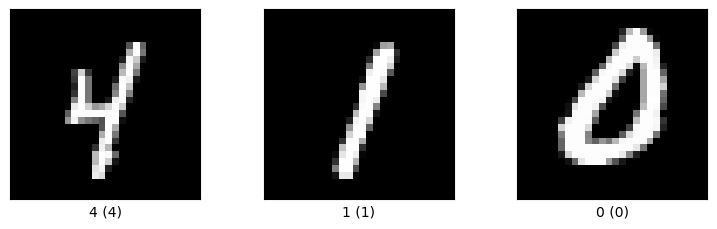

In [35]:
import matplotlib.pyplot as plt

tfds.show_examples(ds, info, rows=1, cols=3);

You can also create your own TFDS with `tf.data.Dataset.from_tensor_slices` as in the following example. 

In [36]:
# let's create random features and labels
np.random.seed(1)
features = np.random.uniform(0,1, size=(16, 100, 100))
labels = np.random.randint(0, 2, size=(16, 1))

# create a TFDS dataset, and use a batch of 4
dataset = tf.data.Dataset.from_tensor_slices((features, labels)).batch(4)

# print the features x and labels y in the dataset
# there are 16 data points, and each batch has 4 data points
for (x_batch, y_batch) in dataset:
    print(f'x_batch shape: {x_batch.shape}, y_batch shape: {y_batch.shape}')
print()        

x_batch shape: (4, 100, 100), y_batch shape: (4, 1)
x_batch shape: (4, 100, 100), y_batch shape: (4, 1)
x_batch shape: (4, 100, 100), y_batch shape: (4, 1)
x_batch shape: (4, 100, 100), y_batch shape: (4, 1)



### References:

1. Moroney, L. (n.d.). AI and Machine Learning for Coders. O’Reilly Online Learning. https://www.oreilly.com/library/view/ai-and-machine/9781492078180/ch04.html 
2. TensorFlow datasets. TensorFlow. (n.d.). https://www.tensorflow.org/datasets/overview#iterate_over_a_dataset 

[BACK TO TOP](#top)